In [26]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('nyc_cop_lon2.csv')

# Explainer notebook

# 1. Motivation

####    What is your dataset?
####    Why did you choose this/these particular dataset(s)?
####    What was your goal for the end user's experience?
The idea of our project, initially, was to research the relation of Copenhagen bicycle use and the weather conditions.  <br />
We decided to add vehicle counts and information on other cities to make the comparrison. <br />
We want to figure out how different cities react to weather changes. <br />
To do this, we combined the vehicle and bicycle count data from different count stations from Copenhagen, New-York and London and combined it with the weather data measured in the same cities in the same time. <br />
To do so we have combined the datasets metionesd by the end of this section. <br />
We figured out thoroughout our reserch that not so many cities have automated systems for traffic counting.
The combined dataset includes 3.000.000+ rows and 15 columns.<br />
The dataset is structured in the way to get fast access for any of the available stations in any of 3 available cities in any given hour and being able to get all the measureds data. <br />
#### Columns
* time - datetime format with hour, day, month and year 
* temp - The air temperature in °C for the given city and given time
* dwpt - The dew point in °C for the given city and given time
* rhum - The relative humidity in percent (%)
* city - City at which the observation was made
* wdir - The average wind direction in degrees (°) for the given city
* wspd - The average wind speed in km/h for the given city
* pres - The average sea-level air pressure in hPa
* longitude	- the longtitude of bicycle count station 
* latitude - the latitude of bicycle count station 
* hour - separate column for hour. It is useful for sorting and visual aid
* type - type that was observed. Vehicle or bicycle 
* count	- observed count of transportation
* ID - id of the station, where the vehicle count was measured in New-York. Saved in case if we could restore the vehicle point coordinates from this id
* Segment ID - id of the street segment, where the vehicle count was measured in New-York. Saved in case if we could restore the vehicle point coordinates from this id.

#### Datasets:
* Copenhagen traffic count between the years 2010-2015: https://www.opendata.dk/city-of-copenhagen/faste-trafiktaellinger
* Copenhagen bicycle count between the years 2010-2015: https://www.opendata.dk/city-of-copenhagen/faste-cykeltaellinger
* London traffic and bicycle count between the years 2010-2015: https://roadtraffic.dft.gov.uk/regions/6
* New-York traffic counts https://www.kaggle.com/datasets/new-york-city/ny-traffic-volume-counts-2012-2013
* New-York bike count https://data.cityofnewyork.us/Transportation/Bicycle-Counts/uczf-rk3c
* New-York bike count station locations https://data.cityofnewyork.us/Transportation/Bicycle-Counters/smn3-rzf9
* Weather data was taken from this api for the years 2010-2015 for all cities: https://dev.meteostat.net/python/hourly.html#data-structure

In [6]:
df

,Unnamed: 0,index,time,temp,dwpt,rhum,city,wdir,wspd,pres,longitude,latitude,hour,type,count,ID,Segment ID
0,0,0,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.564408,55.686473,0.0,bicycle,13.0,NaN,NaN
1,1,1,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.565354,55.641459,0.0,vehicle,27.0,NaN,NaN
2,2,2,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,82.0,NaN,NaN
3,3,3,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.482855,55.710998,0.0,vehicle,163.0,NaN,NaN
4,4,4,2010-01-01 00:00:00,-5.8,-7.0,91.0,Copenhagen,360.0,22.3,1002.6,12.595038,55.670248,0.0,vehicle,242.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021861,3021861,178941,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.985890,40.699810,23.0,bicycle,6.0,NaN,NaN
3021862,3021862,178942,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,0.000000,0.000000,23.0,bicycle,NaN,NaN,NaN
3021863,3021863,178943,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.968386,40.711282,23.0,bicycle,2.0,NaN,NaN
3021864,3021864,178944,2014-12-31 23:00:00,-1.7,-13.9,39.0,New-York,250.0,13.0,1024.6,-73.994750,40.715600,23.0,bicycle,6.0,NaN,NaN


## 2. Basic stats
#### Write about your choices in data cleaning and preprocessing
#### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
Cleaning and preprocessing and exploration was one of the hardest tasks of this project due to the different format of the datasets used. We had to remove unnecessary columns, remove nans, group many columns and then merge the datasets. <br />So we folowed these steps:
1. Getting the weather data for all cities. It was done in the file: <br /> *notebooks/machinelearning_and_weather_data.ipynb* 
2. We had separate datasets for each year of bicycle counts. We had to combine them into one dataset. Then we had to translate the coordinates from the UTM 32 system to longtitude and lattitude. It was done in the file: <br /> *notebooks/preprocessing/2.unifying_copenhagen_datasets.ipynb*
3.  Then we added weather data to Copenhagens df merged all in one Copenhagen dataset. This was done in the file: <br /> *notebooks/preprocessing/3.combining_copenhagen_datasets.ipynb*.
4.  Then we cleaned Londons data, added weather dat to it and added it to the common dataset. This was done in the file: <br />*notebooks/preprocessing/4.cleaning_london_data_and_concatenating_it_with_copenhagen.ipynb*.
5. To complete the data preprocessing we processed New-York dataset. We had to merge the dataset with station IDs and coordinates with the count dataset with IDs. In this way we managed to restore the coordinates for bicycle counting stations. Then we cleaned the data, added weather data to it and concatinated it to the general dataset. This was done in the file: <br />*notebooks/preprocessing/5.process_and_add_new_york.ipynb*.
6. Then we did the basic stats to see if anything is wrong with the data and found out that Londons data only includes time from 7:00 to 18:00 and misses the weekends completely. This dataset also had a lot of missing or wrond data. This could be due to the fact that the dataset was filled in manually compared to the automatic counting machines in New-York or Copenhagen. <br />
 After this discovery, we decided not to use this dataset for anything but general statistics.
![Missing hours](london_is_broken_1.png)
![Missing weekends](london_is_broken_2.png)
![Overally fucked dataset](london_is_broken_3.png)

#### And more stats

In [17]:
df_copenhagen = df[df['city']=='Copenhagen']
df_nyc = df[df['city']=='New-York']

Text(0.5, 1.0, 'Copenhagen count per hour boxplots')

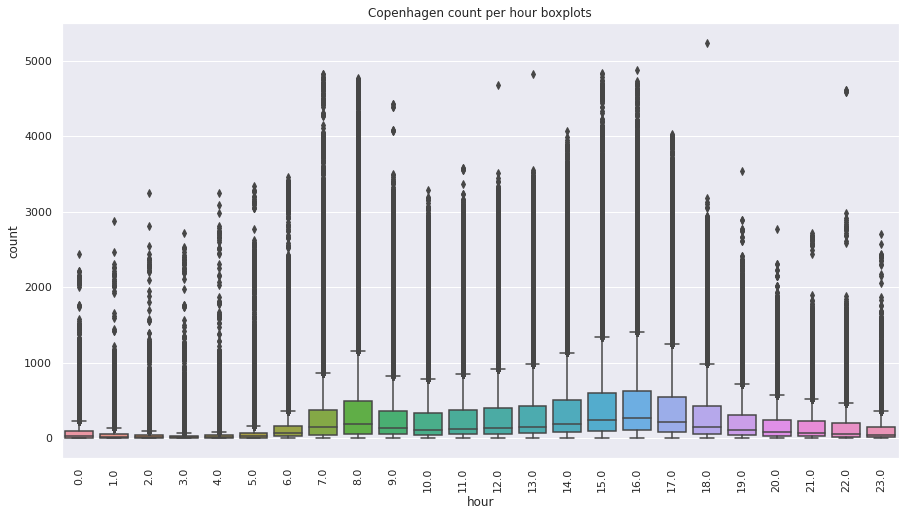

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="hour", y="count", data=df_copenhagen)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Copenhagen count per hour boxplots')

Text(0.5, 1.0, 'New-York count per hour boxplots')

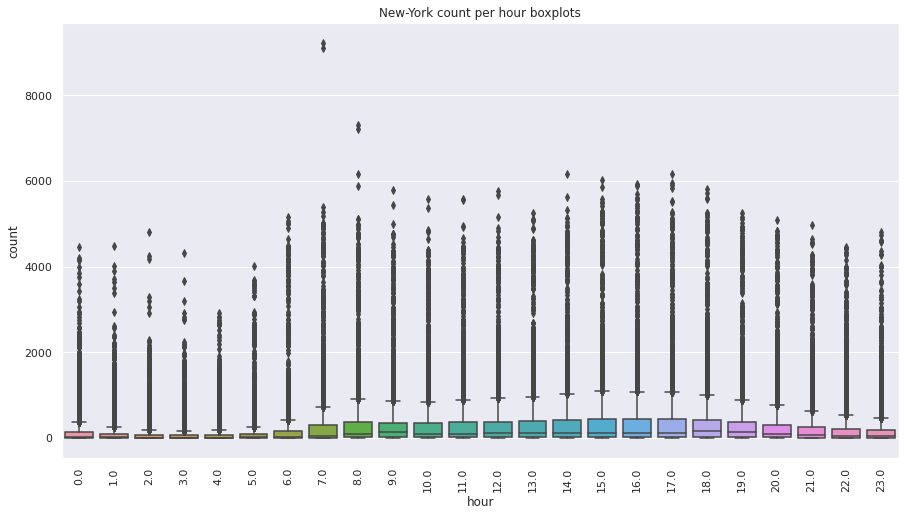

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="hour", y="count", data=df_nyc)
ax.tick_params(axis='x', rotation=90)
ax.set_title('New-York count per hour boxplots')

## 3. Data Analysis
#### Describe your data analysis and explain what you've learned about the dataset. *If relevant, talk about your machine-learning.
Let's talk about machine learning. First, we started with data prepocessing. We split the datetime variable to 2 separate variables (date, time) and then we added a variable with the name of the days that we converted from the date. We focused on the full datasets of Copenhagen and New York City in order for us to compare them more clearly instead of focusing solely on bike and vehicle usage. We also checked about missing values and filled them in with the column mean. Furthermore, we plotted correlation matrices to see which variables are more strongly correlated to the count variable. After that, we decided to try and predict the count variable which shows the bike and vehicle usage. We plotted the histograms for that variable for both ofthe cities and we found out that they follow a power law distribution. Then, we run linear regression with features the weather parameters, type, day and hour to get a prediction on the traffic. Because of the differnce in distributions- power law of true values vs gaussian of the predicted - the model did not give us reliable results. Finally, we run clustermaps (https://seaborn.pydata.org/generated/seaborn.clustermap.html) where we clustered the count variable  based on weather parameters, day,hour and type of transportation in order explore the relationships further.



 <br />
If you wish to find a  visualization code, got to the folder *notebooks/*

## 4 Genre
#### Which genre of data story did you use?
To better explain our data to viewer we decided to use a combination of Magazine Style and Film/Video/Animation.
Magazine style helps us to organise our ideas in order and keep viewers focus.
#### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
* We used highlighting-zooming for the HeatMapWithTime plot, to make it easy for user to see a datapoints we want to show and to tell the picture better. If you zoom out or zoom it, the idea of ours wouldn't be as clear as it was shown.
*  Progress Bar/Timebar allows reader to controll HeatMapWithTime.   
#### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?
* We used Headlines for viewer to be able to identify different parts of our project.
* User Directed Path - user can decide which iteractive tools to use.


## 5 Visualizations
#### Explain the visualizations you've chosen.
#### Why are they right for the story you want to tell?
We have the following types of visualizations:
* Bar charts - we use them for transportation counts distribution per hour for both New-York and Copenhagen. This is done to clearly see peaks in data and their values
* Histograms - to show the distribution of transportation counts throughout the week
* Heat map with time - to show how the traffic counts change in different points, based on humidity and temperature. User is offered a scroll bar to 
*  correlation matrix - to show which values correlate with transport counts with weather condition, to figure out, which conditions have the most effect on transportation use.
* scatter plot - for liner regression visualization.
* decision tree split graph - to show when our machine learning algorithm does the split 
* geographical map - to show all the count stations
* heatmap - to show relation of wind to temperature to transportation count


## 6 Discussion 
#### What went well?
* We have combined so many complex datasets into one. 
* We have found out what weather factors influence bycycle rides the most.
* We proved that danes have viking blood and they are more resistant to rain and wind, compared to americans.
#### What is still missing? What could be improved? Why?
* We could find and delete outliers (we skipped it, due to the lack of time and the small amount of outliers)
* We could have tried more advanced machine learning algorithms
* We could have imported a dataset for coordinates of the vehicle count stations from QGIS files we have found (maybe)
* We could do more basic stats graphs to explore data more
* It is always possible to improve on the narration, by making better focused graph, making text more readable, etc.

## Contributions
Paraskevas-Emmanouil Stratigakis found and retrieved the weather data <br />
Carlo Meroni found bicycle and vehicle data for Copenhagen and New-York <br />
Eriks Markevics found bicycle and vehicle data for London <br />
Eriks Markevics prepocessed and combined the data in one csv file <br />
Carlo Meroni did the bar plots of the traffic patterns over hours and days of weeks <br />
Carlo Meroni did the mean traffic variation plots based on weather parameters <br />
Paraskevas-Emmanouil Stratigakis did the machine learning part <br />
Eriks Markevics did heatmaps with time <br /> 
Carlo Meroni put all the content on the website <br />



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0ec5a11-afa1-4833-a159-96fb81c25427' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>